(0.141, 1, 0.141, 0.3)
[-7.48, -7.38, -6.90818, -6.50656983397589, -6.15758, -5.988687, -5.38, -4.605, -2.68692696, -2.5]
[-12.0, -13.6, -13.8, -14.2, -14.5, -14.4, -13.6, -13.0, -10.1, -9.0]


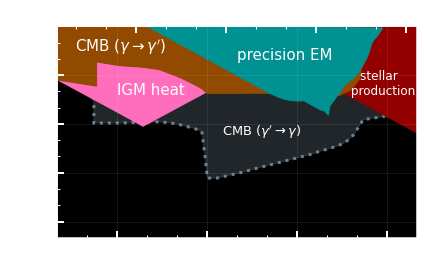

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker
import matplotlib.font_manager
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from matplotlib.texmanager import TexManager
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

%matplotlib inline

# Function to read file of vertices and send back an array of (x, y) tuples
def readFile(fileName):
	vertices = []
	with open(fileName) as f:
		for line in f:
			vertices.append((float(line.split()[0][:-1]), float(line.split()[1])))
	return vertices

label_font = {'fontname':'Arial', 'size':'14', 'color':'white', 'weight':'normal',
          'verticalalignment':'bottom'} 
title_font = {'fontname':'sans-serif', 'size':'16', 'color':'red', 'weight':'bold'}
legend_font = {'family':'sans-serif', 'size':'10', 'style':'normal'} 


# Make the figure
fig, ax = plt.subplots()

# Make the second x-axis
ax2 = ax.twiny()

# Use LaTeX
#plt.rc('text', usetex=True)
#plt.rc('font', family='cmb10')

#plt.rcParams['font.family'] = 'cmb10'

#plt.rc('font',**font)
#plt.rc('font', family='arial')
#plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams['font.cmb10'] = ['cmb10']
# Set LaTeX symbols to bold
#plt.rcParams['text.latex.preamble'] = [r'\boldmath']

#text_font = {'fontname':'stix', 'size':'18', 'color':'black',
 #         'verticalalignment':'bottom'} 

# Bottom x-axis
majorX = [-12, -9, -6, -3]
minorX = [-13, -11, -10, -8, -7, -5, -4]
CB_color_cycle = [(0, 0.286, 0.286), (0, 0.572, 0.572), (1, 0.427, 0.741), (1, 0.741, 0.467), (0.286, 0, 0.572), (0, 0.427, 0.856), (0.430, 0.504, 0.559), (0.427, 0.714, 1), (0.714, 0.856, 1), (0.572, 0, 0), (0.572, 0.286, 0), (1, 0.6, 0.2), (0.141, 1, 0.141), (1, 0.832, 0.020)]
notCBColor = [(1, 0.4, 0.4, 1), (0.78, 0.38, 0.41, 0.65), (1, 0.7, 0.4, 1), (0.73, 0.6, 1, 1), (0.4, 0.4, 0.6, 1), (0.78, 0.38, 0.41, 1), (0.4, 0.6, 1, 1), (0.5, 1, 0.5, 1)]

# Set the major and minor ticks and labels
ax.set_xticks(majorX)
ax.set_xticks(minorX, minor = True)
labels = ['peV', 'neV', u'\u03BCeV', 'meV']


#ax.set_xticklabels(labels, fontname = 'Arial', fontsize = 20, weight = 'normal')

#ax.tick_params(axis='x', which='both', pad=15)

# Set the limits of the plot
ax.set_xlim([-14, -2])

# Set ticks to point inwards
ax.tick_params(which = 'both', direction = 'in')

# Set length and width of major adn minor ticks
ax.tick_params(which = 'major', length = 7, width = 2, pad = 10)
ax.tick_params(which = 'minor', length = 3, width = 1)


# Top x-axis 

# Major and minor ticks and labels
majorXTop = [-11.38, -8.38, -5.38, -2.38]
minorXTop = [-13.38, -12.38, -10.38, -9.38, -7.38, -6.38, -4.38, -3.38]
labelsTop = ['kHz', 'MHz', 'GHz', 'THz']

# Set the span of the top axis to be the same as the span of the bottom
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(majorXTop)
ax2.set_xticks(minorXTop, minor = True)
#ax2.set_xticklabels(labelsTop, fontsize = 20, weight = 'normal')
ax2.set_xticklabels(labelsTop)
ax2.tick_params(which = 'both', direction = 'in')
ax2.tick_params(which = 'major', length = 7, width = 2, pad = 10)
ax2.tick_params(which = 'minor', length = 3, width = 1)
ax2.tick_params(axis='both', which='major', labelsize=11)

# Y-axis

# Set major and minor ticks / labels
majorY = [-3, -6, -9, -12, -15, -18]
minorY = [-4, -5, -7, -8, -10, -11, -13, -14, -16, -17]
ax.set_yticks(majorY)
ax.set_yticks(minorY, minor = True)
labelsY = ['-3', '-6', '-9', '-12', '-15', '-18']
ax.set_yticklabels(labelsY, fontname = 'Arial', fontsize = 20)
ax.set_yticklabels(labelsY)
ax.set_ylim([-16, -3])
ax.tick_params(which = 'both', direction = 'in')
ax.tick_params(which = 'major', length = 7, width = 2, pad = 10)
ax.tick_params(which = 'minor', length = 3, width = 1)
ax.tick_params(axis='both', which='major', labelsize=11)

[i.set_linewidth(1.5) for i in ax.spines.values()]

# x- and y-labels
#ax.set_xlabel(r'$m_{\gamma^{\prime}}$', fontname = 'Arial', fontsize = 26)
#ax.set_ylabel(r'$\mathrm{log} \epsilon$', fontname = 'Arial', fontsize = 26)
ax.set_xlabel(r'$\mathrm{log_{10}}[\mathrm{m}_{\gamma^{\prime}} / eV$]', labelpad = 15, **label_font)
ax.set_ylabel(r'$\mathrm{log_{10}}( \epsilon )$', **label_font)


#verts = [(-6, -10), (-12, -10), (-12, -15), (-6, -15)]

# All the regions in the same plot
CMBBackwardVertices = readFile('CMBBackward.txt')
CMBForwardVertices = readFile('CMBForward.txt')
stellarProductionVertices = readFile('StellarProduction.txt')
precisionEMVertices = readFile('PrecisionEM.txt')
ADMX1Vertices = readFile('ADMX1.txt')
ADMX2Vertices = readFile('ADMX2.txt')
ADMXDRcookbookVertices = readFile('admxDRhandbook.txt')

ADMX2018Vertices = readFile('ADMX-2018.txt')
ADMX20201Vertices = readFile('ADMX-2020_1.txt')
ADMX20202Vertices = readFile('ADMX-2020_2.txt')


plasmaHeatingVertices = readFile('IGMHeating.txt')
DavisLimitsVertices1a = readFile('DavisLimits1a.txt')
DavisLimitsVertices1b = readFile('DavisLimits1b.txt')
DavisLimitsVertices2 = readFile('DavisLimits2_5-21.txt')
DavisLimitsVertices2_OLD = readFile('DavisLimits2_NEW.txt')

Xenon10Vertices = readFile('Xenon10.txt')
#StanfordVertices = readFile('Stanford.txt')
# Creating all the regions and text - note that the lower the z-order the
# sooner the object will get drawn. Values are negative else the x- and y-tics get
# drawn over
ax.add_patch(Polygon(plasmaHeatingVertices, closed=True,
                      fill=True, color = CB_color_cycle[2], zorder = -900))
#ax.text(-13.7, -7.2, r'IGM heat', fontsize=15, rotation=-20, zorder = 1000)
ax.text(-12, -7.2, r'IGM heat', fontname = 'Arial', fontsize=15, zorder = 1000)

#ax.add_patch(Polygon(DavisLimitsVertices1a, closed=True,
#                      fill=True, color = CB_color_cycle[12], zorder = -601))

#ax.text(-6.6, -9.5, 'PHASE-I', fontname = 'Arial', fontsize=12, weight = 'bold', rotation=270, zorder = 1000)

holderColor = (CB_color_cycle[12][0], CB_color_cycle[12][1], CB_color_cycle[12][2], 0.3)
print(holderColor)

DavisLimitsVertices2_x = [x[0] for x in DavisLimitsVertices2]
DavisLimitsVertices2_y = [y[1] for y in DavisLimitsVertices2]

print(DavisLimitsVertices2_x)
print(DavisLimitsVertices2_y)

f2 = interp1d(np.asarray(DavisLimitsVertices2_x), np.asarray(DavisLimitsVertices2_y), kind='linear')
cs = CubicSpline(DavisLimitsVertices2_x, DavisLimitsVertices2_y)

DavisLimitsVertices2_newX = []
DavisLimitsVertices2_new = []

for counter in range(len(DavisLimitsVertices2_x) - 1):
  moreX = np.linspace(DavisLimitsVertices2_x[counter], DavisLimitsVertices2_x[counter+1], num = 3, endpoint = False)
  for val in moreX:
    DavisLimitsVertices2_newX.append(val)



for val in DavisLimitsVertices2_newX:
  DavisLimitsVertices2_new.append((val, f2(val)))

#DavisLimitsVertices2 = [(val[0], val[1]  + np.log10((3./4.)**0.5)) if (val[0] > -6.906 and val[0] < -5.906) else (val[0], val[1]) for val in DavisLimitsVertices2]
#DavisLimitsVertices2 = [(val[0] , val[1] + np.log10(12.**0.25)) for val in DavisLimitsVertices2]
#ax.add_patch(Polygon(DavisLimitsVertices2, closed=False, fill=False, linestyle = 'dashed', color = 'black', linewidth = 3, zorder = -1000))
#ax.text(-8.5, -15.0, 'PHASE-2', fontname = 'Arial', fontsize=12, fontweight = 'bold', rotation=0, zorder = 1000, color = 'black')
#ax.add_patch(Polygon(DavisLimitsVertices2_OLD, closed=False, fill=False, linestyle = 'dashed', color = 'blue', linewidth = 3, zorder = -1000))
#ax.text(-10, -14.0, 'PHASE-2 OLD', fontname = 'Arial', fontsize=12, fontweight = 'bold', rotation=0, zorder = 1000, color = 'blue')

# Legend that got removed
#ax.add_patch(Rectangle((-12.7, -15.95), width = 5, height = 2, fill = False, linestyle = 'dashed', color = 'black'))
#plt.plot([-12.1], [-14.7], 'ro', markersize = 10)
#ax.text(-10, -15.6, 'Extrapolated calibration \n at 110 MHz', ha = 'center')

#spot test
# Points at 30 MHz, 110.2 MHz, and 270 MHz
#plt.plot([-5.91, -6.34, -6.91], [-13.63, -13.35, -13.00], 'o', color = CB_color_cycle[11], markersize = 10, zorder = -1100)

#Points at 64 MHz, 70 MHz, 151 MHz, and 246.7 MHz
#plt.plot([-6.58, -6.54, -6.20, -5.99], [-12.75, -13.7, -12.13, -12.4], '.', markerfacecolor = CB_color_cycle[11], markeredgecolor = 'black', color = CB_color_cycle[11], markersize = 12, zorder = -500)
#plt.plot([-6.58, -6.54, -6.20, -5.99], [-12.74, -12.46, -12.38, -12.28], '.', markerfacecolor = CB_color_cycle[11], markeredgecolor = 'black', color = CB_color_cycle[11], markersize = 12, zorder = -500)

#plt.plot([-6, -7.1], [-13.6, -13.75], 'o', color = CB_color_cycle[11], markersize = 10, zorder = -1100)
#plt.plot([-8.69], [-8.82], '.', color = 'red', markeredgecolor = 'black', markersize = 12)
#Data point for 30 MHz being retaken
#plt.plot([-6.91], [-15.6], 'ro', markersize = 10, zorder = -1100)

holderEps = []
holderMass = []
counter = 0
totalSum = 0

'''
#with open('EpsilonVals_NEW-METHOD_WITHTIME_7-6-2020_9-53-38_EXTRAPOLATED1.0YEAR.txt') as f:
with open('EpsilonVals_5-7-2021_11-30-41.txt') as f:
  f.readline()
  for counter, line in enumerate(f):
    holder = line.split()
    if len(holder) == 2:
      holderEps.append(np.log10(float(holder[1])/(60.*60.*24.*365 / 12./13600)**0.25) - 14.)
      holderEps[-1] = 0.5*np.log10(350./400.) - 0.5 + holderEps[-1]
      totalSum = totalSum + float(holder[1])
      counter = counter + 1
      holderMass.append(np.log10(float(holder[0])*4.118)-9.)
    else:
      print(holder)
'''


'''
for val in zip(holderMass, holderEps):
  print(val)

#print('MEAN EPSILON: ' + str(totalSum/counter))
actualVertices = [(x[0], x[1]) for x in zip(holderMass[::1000], holderEps[::1000])]
actualVertices[0] = (actualVertices[0][0], -3)
actualVertices[-1] = (actualVertices[-1][0], -3)
print(actualVertices[-1])
#print(actualVertices)
ax.add_patch(Polygon(actualVertices, closed=True, fill=True, color = CB_color_cycle[12], zorder = -601))

#plt.plot(holderMass[::500], holderEps[::500], '-', color = 'black', alpha = 0.5)
'''

#ax.add_patch(Polygon(StanfordVertices, closed = True, fill = True, zorder = -900, alpha = 0.9))
#ax.text(-11, -10, r'Stanford', fontsize=15, zorder = 1000)

ax.add_patch(Polygon(CMBBackwardVertices, closed=True,
                      fill=True, color = CB_color_cycle[6], alpha = 0.3, zorder = -1000))

ax.add_patch(Polygon(CMBBackwardVertices, closed=False, fill=False, linestyle = 'dotted', color = CB_color_cycle[6], linewidth = 3, alpha = 1, zorder = -1000))

ax.text(-8.5, -9.7, r'CMB $( \gamma^{\prime} \rightarrow \gamma )$', fontname = 'Arial', fontsize=13, color = 'white', zorder = 1000)

ax.add_patch(Polygon(stellarProductionVertices, closed=True,
                      fill=True, color = CB_color_cycle[9], zorder = -900))
ax.text(-3.2, -7.2, 'stellar \n production', fontname = 'Arial', fontsize=12, ha = 'center', zorder = 1000)

ax.add_patch(Polygon(CMBForwardVertices, closed=True,
                      fill=True, color = CB_color_cycle[10], zorder = -800))
ax.text(-13.4, -4.5, r'CMB $( \gamma \rightarrow \gamma^{\prime} )$', fontname = 'Arial', fontsize=15, zorder = 1000)

#ax.text(-4.3, -15.5, 'UCD Phase 2\n projection', fontsize=12, rotation = 20, zorder = 1000)
#ax.text(-3.7, -10, 'UCD Phase-2 projection', fontsize=12, rotation = 270, zorder = 1000)
#plt.plot(*zip(*DavisLimitsVertices2), linewidth = 2, linestyle = 'dashed', color = CB_color_cycle[5], zorder = -1500)


ax.add_patch(Polygon(precisionEMVertices, closed=True,
                      fill=True, color = CB_color_cycle[1], zorder = -600))
ax.text(-8.0, -5, r'precision EM', fontname = 'Arial', fontsize=15, zorder = 1000)


#ax.add_patch(Polygon(ADMX20201Vertices, closed=True,
#                      fill=True, color = CB_color_cycle[13], zorder = -500))

#ax.add_patch(Polygon(ADMX20202Vertices, closed=True,
#                      fill=True, color = CB_color_cycle[13], zorder = -500))

#ax.add_patch(Polygon(ADMX2018Vertices, closed=True,
#                      fill=True, color = CB_color_cycle[13], zorder = -500))

#ADMX1.txt
'''
ax.add_patch(Polygon(ADMX1Vertices, closed=True,
                      fill=True, color = CB_color_cycle[12], zorder = -500))
ax.text(-5.8, -10, r'ADMX', fontname = 'Arial', fontsize=10, rotation=270, zorder = 1000)
'''


'''
ax.add_patch(Polygon(ADMX2Vertices, closed=True,
                      fill=True, color = CB_color_cycle[12], zorder = -400))
ax.text(-5.3, -8.8, r'Axion Haloscopes', fontname = 'Arial', fontsize=10, rotation=270, zorder = 1000)
'''

#ax.add_patch(Polygon(Xenon10Vertices, closed=True,
                      #hatch = '/', fill = False, color = (0, 0, 0, 0.5), zorder = -300))
#ax.text(-4.5, -5.8, 'XENON10', fontname = 'Arial', fontsize=12, rotation=45, zorder = 1000)


#ax.add_patch(Polygon(ADMXDRcookbookVertices, closed=True,
                      #fill=True, color = CB_color_cycle[11], zorder = -700))
#ax.text(-5.73, -10, r'ADMX', fontname = 'Arial', fontsize=8, rotation=270, zorder = 1000)

'''
ax.add_patch(Polygon(DavisLimitsVertices2, closed=False, fill=False, linestyle = 'dashed', color = 'black', linewidth = 3, zorder = -100))
ax.text(-8.5, -15.0, 'PHASE-II', fontname = 'Arial', fontsize=12, fontweight = 'bold', rotation=0, zorder = 1000, color = 'black')
#Title that got removed
'''

#uncomment, run, get error, recomment
#plt.style.use('dark_background')
#plt.style.use('classic')

#plt.plot(x, y)
#plt.title('Reach of Hidden Photon Experiments', fontsize = 30, y = 1.10)

# Keep the x- and y-labels from being cut off
plt.tight_layout()

ax.grid(alpha = .1, zorder = -1000)


# Save as a .png
plt.savefig('LimitPlot_10-15-22.png', bbox_inches = 'tight', dpi = 600)
plt.show()
# Save as an .svg
plt.savefig("Plot.svg")

plt.close()









(50.0, 5000.0)

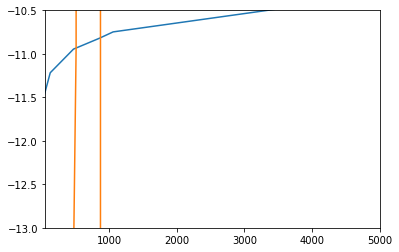

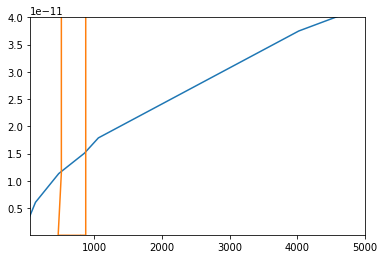

In [2]:
# All the regions in the sand plot
CMBBackwardVertices = readFile('CMBBackward.txt')
CMBForwardVertices = readFile('CMBForward.txt')
stellarProductionVertices = readFile('StellarProduction.txt')
precisionEMVertices = readFile('PrecisionEM.txt')
ADMX1Vertices = readFile('ADMX1.txt')
ADMX2Vertices = readFile('ADMX2.txt')
ADMXDRcookbookVertices = readFile('admxDRhandbook.txt')

ADMX2018Vertices = readFile('ADMX-2018.txt')
ADMX20201Vertices = readFile('ADMX-2020_1.txt')
ADMX20202Vertices = readFile('ADMX-2020_2.txt')


plasmaHeatingVertices = readFile('IGMHeating.txt')
DavisLimitsVertices1a = readFile('DavisLimits1a.txt')
DavisLimitsVertices1b = readFile('DavisLimits1b.txt')
DavisLimitsVertices2 = readFile('DavisLimits2_5-21.txt')
DavisLimitsVertices2_OLD = readFile('DavisLimits2_NEW.txt')

def lim2lin(limList):
    h = 4.13e-15
    freqList = []
    epsilonList = []
    for i in limList:
        f = 10**(i[0]) / h /1e6
        epsilon = 10**(i[1])
        freqList.append(f)
        epsilonList.append(epsilon)
    return(freqList, epsilonList)
    
CMBBackwardVerticesFreqLin, CMBBackwardVerticesEpsilonLin =  lim2lin(CMBBackwardVertices)
ADMXDRcookbookVerticesFreqLin, ADMXDRcookbookVerticesEpsilonLin =  lim2lin(ADMXDRcookbookVertices)

plt.close('all')

plt.plot(CMBBackwardVerticesFreqLin, np.log10(CMBBackwardVerticesEpsilonLin))
plt.plot(ADMXDRcookbookVerticesFreqLin, np.log10(ADMXDRcookbookVerticesEpsilonLin))
plt.ylim(-13, -10.5)
plt.xlim(50, 5000)

plt.figure()
plt.plot(CMBBackwardVerticesFreqLin, (CMBBackwardVerticesEpsilonLin))
plt.plot(ADMXDRcookbookVerticesFreqLin, (ADMXDRcookbookVerticesEpsilonLin))
plt.ylim(1e-13, 4e-11)
plt.xlim(50, 5000)

(0.141, 1, 0.141, 0.3)
[-7.48, -7.38, -6.90818, -6.50656983397589, -6.15758, -5.988687, -5.38, -4.605, -2.68692696, -2.5]
[-12.0, -13.6, -13.8, -14.2, -14.5, -14.4, -13.6, -13.0, -10.1, -9.0]


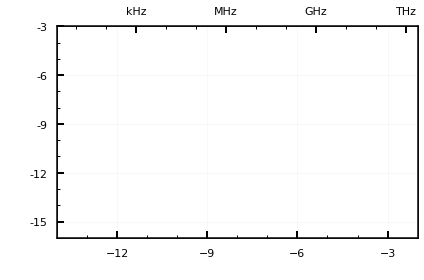

In [2]:


%matplotlib inline

# Function to read file of vertices and send back an array of (x, y) tuples
def readFile(fileName):
	vertices = []
	with open(fileName) as f:
		for line in f:
			vertices.append((float(line.split()[0][:-1]), float(line.split()[1])))
	return vertices

label_font = {'fontname':'Arial', 'size':'14', 'color':'white', 'weight':'normal',
          'verticalalignment':'bottom'} 
title_font = {'fontname':'sans-serif', 'size':'16', 'color':'red', 'weight':'bold'}
legend_font = {'family':'sans-serif', 'size':'10', 'style':'normal'} 


# Make the figure
fig, ax = plt.subplots()

# Make the second x-axis
ax2 = ax.twiny()

# Use LaTeX
#plt.rc('text', usetex=True)
#plt.rc('font', family='cmb10')

#plt.rcParams['font.family'] = 'cmb10'

#plt.rc('font',**font)
#plt.rc('font', family='arial')
#plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams['font.cmb10'] = ['cmb10']
# Set LaTeX symbols to bold
#plt.rcParams['text.latex.preamble'] = [r'\boldmath']

#text_font = {'fontname':'stix', 'size':'18', 'color':'black',
 #         'verticalalignment':'bottom'} 

# Bottom x-axis
majorX = [-12, -9, -6, -3]
minorX = [-13, -11, -10, -8, -7, -5, -4]
CB_color_cycle = [(0, 0.286, 0.286), (0, 0.572, 0.572), (1, 0.427, 0.741), (1, 0.741, 0.467), (0.286, 0, 0.572), (0, 0.427, 0.856), (0.430, 0.504, 0.559), (0.427, 0.714, 1), (0.714, 0.856, 1), (0.572, 0, 0), (0.572, 0.286, 0), (1, 0.6, 0.2), (0.141, 1, 0.141), (1, 0.832, 0.020)]
notCBColor = [(1, 0.4, 0.4, 1), (0.78, 0.38, 0.41, 0.65), (1, 0.7, 0.4, 1), (0.73, 0.6, 1, 1), (0.4, 0.4, 0.6, 1), (0.78, 0.38, 0.41, 1), (0.4, 0.6, 1, 1), (0.5, 1, 0.5, 1)]

# Set the major and minor ticks and labels
ax.set_xticks(majorX)
ax.set_xticks(minorX, minor = True)
labels = ['peV', 'neV', u'\u03BCeV', 'meV']


#ax.set_xticklabels(labels, fontname = 'Arial', fontsize = 20, weight = 'normal')

#ax.tick_params(axis='x', which='both', pad=15)

# Set the limits of the plot
ax.set_xlim([-14, -2])

# Set ticks to point inwards
ax.tick_params(which = 'both', direction = 'in')

# Set length and width of major adn minor ticks
ax.tick_params(which = 'major', length = 7, width = 2, pad = 10)
ax.tick_params(which = 'minor', length = 3, width = 1)


# Top x-axis 

# Major and minor ticks and labels
majorXTop = [-11.38, -8.38, -5.38, -2.38]
minorXTop = [-13.38, -12.38, -10.38, -9.38, -7.38, -6.38, -4.38, -3.38]
labelsTop = ['kHz', 'MHz', 'GHz', 'THz']

# Set the span of the top axis to be the same as the span of the bottom
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(majorXTop)
ax2.set_xticks(minorXTop, minor = True)
#ax2.set_xticklabels(labelsTop, fontsize = 20, weight = 'normal')
ax2.set_xticklabels(labelsTop)
ax2.tick_params(which = 'both', direction = 'in')
ax2.tick_params(which = 'major', length = 7, width = 2, pad = 10)
ax2.tick_params(which = 'minor', length = 3, width = 1)
ax2.tick_params(axis='both', which='major', labelsize=11)

# Y-axis

# Set major and minor ticks / labels
majorY = [-3, -6, -9, -12, -15, -18]
minorY = [-4, -5, -7, -8, -10, -11, -13, -14, -16, -17]
ax.set_yticks(majorY)
ax.set_yticks(minorY, minor = True)
labelsY = ['-3', '-6', '-9', '-12', '-15', '-18']
ax.set_yticklabels(labelsY, fontname = 'Arial', fontsize = 20)
ax.set_yticklabels(labelsY)
ax.set_ylim([-16, -3])
ax.tick_params(which = 'both', direction = 'in')
ax.tick_params(which = 'major', length = 7, width = 2, pad = 10)
ax.tick_params(which = 'minor', length = 3, width = 1)
ax.tick_params(axis='both', which='major', labelsize=11)

[i.set_linewidth(1.5) for i in ax.spines.values()]

# x- and y-labels
#ax.set_xlabel(r'$m_{\gamma^{\prime}}$', fontname = 'Arial', fontsize = 26)
#ax.set_ylabel(r'$\mathrm{log} \epsilon$', fontname = 'Arial', fontsize = 26)
ax.set_xlabel(r'$\mathrm{log_{10}}[\mathrm{m}_{\gamma^{\prime}} / eV$]', labelpad = 15, **label_font)
ax.set_ylabel(r'$\mathrm{log_{10}}( \epsilon )$', **label_font)


holderColor = (CB_color_cycle[12][0], CB_color_cycle[12][1], CB_color_cycle[12][2], 0.3)
print(holderColor)

DavisLimitsVertices2_x = [x[0] for x in DavisLimitsVertices2]
DavisLimitsVertices2_y = [y[1] for y in DavisLimitsVertices2]

print(DavisLimitsVertices2_x)
print(DavisLimitsVertices2_y)

f2 = interp1d(np.asarray(DavisLimitsVertices2_x), np.asarray(DavisLimitsVertices2_y), kind='linear')
cs = CubicSpline(DavisLimitsVertices2_x, DavisLimitsVertices2_y)

DavisLimitsVertices2_newX = []
DavisLimitsVertices2_new = []

for counter in range(len(DavisLimitsVertices2_x) - 1):
  moreX = np.linspace(DavisLimitsVertices2_x[counter], DavisLimitsVertices2_x[counter+1], num = 3, endpoint = False)
  for val in moreX:
    DavisLimitsVertices2_newX.append(val)



for val in DavisLimitsVertices2_newX:
  DavisLimitsVertices2_new.append((val, f2(val)))



holderEps = []
holderMass = []
counter = 0
totalSum = 0


# Keep the x- and y-labels from being cut off
plt.tight_layout()

ax.grid(alpha = .1, zorder = -1000)


# Save as a .png
plt.savefig('LimitPlot_10-15-22_noLimits.png', bbox_inches = 'tight', dpi = 600)
plt.show()
# Save as an .svg
plt.savefig("Plot.svg")

plt.close()









findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


(0.141, 1, 0.141, 0.3)
[-7.48, -7.38, -6.90818, -6.50656983397589, -6.15758, -5.988687, -5.38, -4.605, -2.68692696, -2.5]
[-12.0, -13.6, -13.8, -14.2, -14.5, -14.4, -13.6, -13.0, -10.1, -9.0]


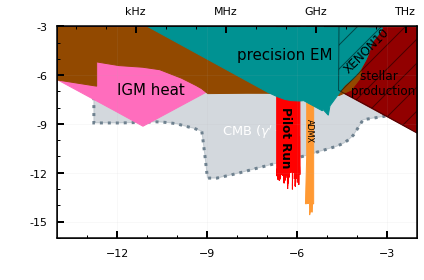

In [3]:
#with pilot data 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker
import matplotlib.font_manager
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from matplotlib.texmanager import TexManager
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

%matplotlib inline

# Function to read file of vertices and send back an array of (x, y) tuples
def readFile(fileName):
	vertices = []
	with open(fileName) as f:
		for line in f:
			vertices.append((float(line.split()[0][:-1]), float(line.split()[1])))
	return vertices

label_font = {'fontname':'Arial', 'size':'14', 'color':'white', 'weight':'normal',
          'verticalalignment':'bottom'} 
title_font = {'fontname':'sans-serif', 'size':'16', 'color':'red', 'weight':'bold'}
legend_font = {'family':'sans-serif', 'size':'10', 'style':'normal'} 


# Make the figure
fig, ax = plt.subplots()

# Make the second x-axis
ax2 = ax.twiny()

# Use LaTeX
#plt.rc('text', usetex=True)
#plt.rc('font', family='cmb10')

#plt.rcParams['font.family'] = 'cmb10'

#plt.rc('font',**font)
#plt.rc('font', family='arial')
#plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams['font.cmb10'] = ['cmb10']
# Set LaTeX symbols to bold
#plt.rcParams['text.latex.preamble'] = [r'\boldmath']

#text_font = {'fontname':'stix', 'size':'18', 'color':'black',
 #         'verticalalignment':'bottom'} 

# Bottom x-axis
majorX = [-12, -9, -6, -3]
minorX = [-13, -11, -10, -8, -7, -5, -4]
CB_color_cycle = [(0, 0.286, 0.286), (0, 0.572, 0.572), (1, 0.427, 0.741), (1, 0.741, 0.467), (0.286, 0, 0.572), (0, 0.427, 0.856), (0.430, 0.504, 0.559), (0.427, 0.714, 1), (0.714, 0.856, 1), (0.572, 0, 0), (0.572, 0.286, 0), (1, 0.6, 0.2), (0.141, 1, 0.141), (1, 0.832, 0.020)]
notCBColor = [(1, 0.4, 0.4, 1), (0.78, 0.38, 0.41, 0.65), (1, 0.7, 0.4, 1), (0.73, 0.6, 1, 1), (0.4, 0.4, 0.6, 1), (0.78, 0.38, 0.41, 1), (0.4, 0.6, 1, 1), (0.5, 1, 0.5, 1)]

# Set the major and minor ticks and labels
ax.set_xticks(majorX)
ax.set_xticks(minorX, minor = True)
labels = ['peV', 'neV', u'\u03BCeV', 'meV']


#ax.set_xticklabels(labels, fontname = 'Arial', fontsize = 20, weight = 'normal')

#ax.tick_params(axis='x', which='both', pad=15)

# Set the limits of the plot
ax.set_xlim([-14, -2])

# Set ticks to point inwards
ax.tick_params(which = 'both', direction = 'in')

# Set length and width of major adn minor ticks
ax.tick_params(which = 'major', length = 7, width = 2, pad = 10)
ax.tick_params(which = 'minor', length = 3, width = 1)


# Top x-axis 

# Major and minor ticks and labels
majorXTop = [-11.38, -8.38, -5.38, -2.38]
minorXTop = [-13.38, -12.38, -10.38, -9.38, -7.38, -6.38, -4.38, -3.38]
labelsTop = ['kHz', 'MHz', 'GHz', 'THz']

# Set the span of the top axis to be the same as the span of the bottom
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(majorXTop)
ax2.set_xticks(minorXTop, minor = True)
#ax2.set_xticklabels(labelsTop, fontsize = 20, weight = 'normal')
ax2.set_xticklabels(labelsTop)
ax2.tick_params(which = 'both', direction = 'in')
ax2.tick_params(which = 'major', length = 7, width = 2, pad = 10)
ax2.tick_params(which = 'minor', length = 3, width = 1)
ax2.tick_params(axis='both', which='major', labelsize=11)

# Y-axis

# Set major and minor ticks / labels
majorY = [-3, -6, -9, -12, -15, -18]
minorY = [-4, -5, -7, -8, -10, -11, -13, -14, -16, -17]
ax.set_yticks(majorY)
ax.set_yticks(minorY, minor = True)
labelsY = ['-3', '-6', '-9', '-12', '-15', '-18']
ax.set_yticklabels(labelsY, fontname = 'Arial', fontsize = 20)
ax.set_yticklabels(labelsY)
ax.set_ylim([-16, -3])
ax.tick_params(which = 'both', direction = 'in')
ax.tick_params(which = 'major', length = 7, width = 2, pad = 10)
ax.tick_params(which = 'minor', length = 3, width = 1)
ax.tick_params(axis='both', which='major', labelsize=11)

[i.set_linewidth(1.5) for i in ax.spines.values()]

# x- and y-labels
#ax.set_xlabel(r'$m_{\gamma^{\prime}}$', fontname = 'Arial', fontsize = 26)
#ax.set_ylabel(r'$\mathrm{log} \epsilon$', fontname = 'Arial', fontsize = 26)
ax.set_xlabel(r'$\mathrm{log_{10}}[\mathrm{m}_{\gamma^{\prime}} / eV$]', labelpad = 15, **label_font)
ax.set_ylabel(r'$\mathrm{log_{10}}( \epsilon )$', **label_font)


#verts = [(-6, -10), (-12, -10), (-12, -15), (-6, -15)]

# All the regions in the sand plot
CMBBackwardVertices = readFile('CMBBackward.txt')
CMBForwardVertices = readFile('CMBForward.txt')
stellarProductionVertices = readFile('StellarProduction.txt')
precisionEMVertices = readFile('PrecisionEM.txt')
ADMX1Vertices = readFile('ADMX1.txt')
ADMX2Vertices = readFile('ADMX2.txt')
ADMXDRcookbookVertices = readFile('admxDRhandbook.txt')

ADMX2018Vertices = readFile('ADMX-2018.txt')
ADMX20201Vertices = readFile('ADMX-2020_1.txt')
ADMX20202Vertices = readFile('ADMX-2020_2.txt')


plasmaHeatingVertices = readFile('IGMHeating.txt')
DavisLimitsVertices1a = readFile('DavisLimits1a.txt')
DavisLimitsVertices1b = readFile('DavisLimits1b.txt')
DavisLimitsVertices2 = readFile('DavisLimits2_5-21.txt')
DavisLimitsVertices2_OLD = readFile('DavisLimits2_NEW.txt')

DavisPilot = readFile('DavisPilot.txt')

Xenon10Vertices = readFile('Xenon10.txt')
#StanfordVertices = readFile('Stanford.txt')
# Creating all the regions and text - note that the lower the z-order the
# sooner the object will get drawn. Values are negative else the x- and y-tics get
# drawn over
ax.add_patch(Polygon(plasmaHeatingVertices, closed=True,
                      fill=True, color = CB_color_cycle[2], zorder = -900))
#ax.text(-13.7, -7.2, r'IGM heat', fontsize=15, rotation=-20, zorder = 1000)
ax.text(-12, -7.2, r'IGM heat', fontname = 'Arial', fontsize=15, zorder = 1000)


holderColor = (CB_color_cycle[12][0], CB_color_cycle[12][1], CB_color_cycle[12][2], 0.3)
print(holderColor)

DavisLimitsVertices2_x = [x[0] for x in DavisLimitsVertices2]
DavisLimitsVertices2_y = [y[1] for y in DavisLimitsVertices2]

print(DavisLimitsVertices2_x)
print(DavisLimitsVertices2_y)

f2 = interp1d(np.asarray(DavisLimitsVertices2_x), np.asarray(DavisLimitsVertices2_y), kind='linear')
cs = CubicSpline(DavisLimitsVertices2_x, DavisLimitsVertices2_y)

DavisLimitsVertices2_newX = []
DavisLimitsVertices2_new = []

for counter in range(len(DavisLimitsVertices2_x) - 1):
  moreX = np.linspace(DavisLimitsVertices2_x[counter], DavisLimitsVertices2_x[counter+1], num = 3, endpoint = False)
  for val in moreX:
    DavisLimitsVertices2_newX.append(val)



for val in DavisLimitsVertices2_newX:
  DavisLimitsVertices2_new.append((val, f2(val)))

#DavisLimitsVertices2 = [(val[0], val[1]  + np.log10((3./4.)**0.5)) if (val[0] > -6.906 and val[0] < -5.906) else (val[0], val[1]) for val in DavisLimitsVertices2]
#DavisLimitsVertices2 = [(val[0] , val[1] + np.log10(12.**0.25)) for val in DavisLimitsVertices2]
#ax.add_patch(Polygon(DavisLimitsVertices2, closed=False, fill=False, linestyle = 'dashed', color = 'black', linewidth = 3, zorder = -1000))
#ax.text(-8.5, -15.0, 'PHASE-2', fontname = 'Arial', fontsize=12, fontweight = 'bold', rotation=0, zorder = 1000, color = 'black')
#ax.add_patch(Polygon(DavisLimitsVertices2_OLD, closed=False, fill=False, linestyle = 'dashed', color = 'blue', linewidth = 3, zorder = -1000))
#ax.text(-10, -14.0, 'PHASE-2 OLD', fontname = 'Arial', fontsize=12, fontweight = 'bold', rotation=0, zorder = 1000, color = 'blue')

# Legend that got removed
#ax.add_patch(Rectangle((-12.7, -15.95), width = 5, height = 2, fill = False, linestyle = 'dashed', color = 'black'))
#plt.plot([-12.1], [-14.7], 'ro', markersize = 10)
#ax.text(-10, -15.6, 'Extrapolated calibration \n at 110 MHz', ha = 'center')

#spot test
# Points at 30 MHz, 110.2 MHz, and 270 MHz
#plt.plot([-5.91, -6.34, -6.91], [-13.63, -13.35, -13.00], 'o', color = CB_color_cycle[11], markersize = 10, zorder = -1100)

#Points at 64 MHz, 70 MHz, 151 MHz, and 246.7 MHz
#plt.plot([-6.58, -6.54, -6.20, -5.99], [-12.75, -13.7, -12.13, -12.4], '.', markerfacecolor = CB_color_cycle[11], markeredgecolor = 'black', color = CB_color_cycle[11], markersize = 12, zorder = -500)
#plt.plot([-6.58, -6.54, -6.20, -5.99], [-12.74, -12.46, -12.38, -12.28], '.', markerfacecolor = CB_color_cycle[11], markeredgecolor = 'black', color = CB_color_cycle[11], markersize = 12, zorder = -500)

#plt.plot([-6, -7.1], [-13.6, -13.75], 'o', color = CB_color_cycle[11], markersize = 10, zorder = -1100)
#plt.plot([-8.69], [-8.82], '.', color = 'red', markeredgecolor = 'black', markersize = 12)
#Data point for 30 MHz being retaken
#plt.plot([-6.91], [-15.6], 'ro', markersize = 10, zorder = -1100)

holderEps = []
holderMass = []
counter = 0
totalSum = 0

'''
#with open('EpsilonVals_NEW-METHOD_WITHTIME_7-6-2020_9-53-38_EXTRAPOLATED1.0YEAR.txt') as f:
with open('EpsilonVals_5-7-2021_11-30-41.txt') as f:
  f.readline()
  for counter, line in enumerate(f):
    holder = line.split()
    if len(holder) == 2:
      holderEps.append(np.log10(float(holder[1])/(60.*60.*24.*365 / 12./13600)**0.25) - 14.)
      holderEps[-1] = 0.5*np.log10(350./400.) - 0.5 + holderEps[-1]
      totalSum = totalSum + float(holder[1])
      counter = counter + 1
      holderMass.append(np.log10(float(holder[0])*4.118)-9.)
    else:
      print(holder)
'''


'''
for val in zip(holderMass, holderEps):
  print(val)

#print('MEAN EPSILON: ' + str(totalSum/counter))
actualVertices = [(x[0], x[1]) for x in zip(holderMass[::1000], holderEps[::1000])]
actualVertices[0] = (actualVertices[0][0], -3)
actualVertices[-1] = (actualVertices[-1][0], -3)
print(actualVertices[-1])
#print(actualVertices)
ax.add_patch(Polygon(actualVertices, closed=True, fill=True, color = CB_color_cycle[12], zorder = -601))

#plt.plot(holderMass[::500], holderEps[::500], '-', color = 'black', alpha = 0.5)
'''

#ax.add_patch(Polygon(StanfordVertices, closed = True, fill = True, zorder = -900, alpha = 0.9))
#ax.text(-11, -10, r'Stanford', fontsize=15, zorder = 1000)

ax.add_patch(Polygon(CMBBackwardVertices, closed=True,
                      fill=True, color = CB_color_cycle[6], alpha = 0.3, zorder = -1000))

ax.add_patch(Polygon(CMBBackwardVertices, closed=False, fill=False, linestyle = 'dotted', color = CB_color_cycle[6], linewidth = 3, alpha = 1, zorder = -1000))

ax.text(-8.5, -9.7, r'CMB $( \gamma^{\prime} \rightarrow \gamma )$', fontname = 'Arial', fontsize=13, color = 'white', zorder = -1000)

ax.add_patch(Polygon(stellarProductionVertices, closed=True,
                      fill=True, color = CB_color_cycle[9], zorder = -900))
ax.text(-3.2, -7.2, 'stellar \n production', fontname = 'Arial', fontsize=12, ha = 'center', zorder = 1000)

ax.add_patch(Polygon(CMBForwardVertices, closed=True,
                      fill=True, color = CB_color_cycle[10], zorder = -800))
ax.text(-13.4, -4.5, r'CMB $( \gamma \rightarrow \gamma^{\prime} )$', fontname = 'Arial', fontsize=15, zorder = -1000)

#ax.text(-4.3, -15.5, 'UCD Phase 2\n projection', fontsize=12, rotation = 20, zorder = 1000)
#ax.text(-3.7, -10, 'UCD Phase-2 projection', fontsize=12, rotation = 270, zorder = 1000)
#plt.plot(*zip(*DavisLimitsVertices2), linewidth = 2, linestyle = 'dashed', color = CB_color_cycle[5], zorder = -1500)


ax.add_patch(Polygon(precisionEMVertices, closed=True,
                      fill=True, color = CB_color_cycle[1], zorder = -600))
ax.text(-8.0, -5, r'precision EM', fontname = 'Arial', fontsize=15, zorder = 1000)


ax.add_patch(Polygon(DavisPilot, closed=True,
                      fill=True, color = 'red', zorder = -601))

ax.text(-6.6, -11.5, 'Pilot Run', fontname = 'Arial', fontsize=12, weight = 'bold', rotation=270, zorder = 1000)


#ax.add_patch(Polygon(ADMX20201Vertices, closed=True,
#                      fill=True, color = CB_color_cycle[13], zorder = -500))

#ax.add_patch(Polygon(ADMX20202Vertices, closed=True,
#                      fill=True, color = CB_color_cycle[13], zorder = -500))

#ax.add_patch(Polygon(ADMX2018Vertices, closed=True,
#                      fill=True, color = CB_color_cycle[13], zorder = -500))

#ADMX1.txt
'''
ax.add_patch(Polygon(ADMX1Vertices, closed=True,
                      fill=True, color = CB_color_cycle[12], zorder = -500))
ax.text(-5.8, -10, r'ADMX', fontname = 'Arial', fontsize=10, rotation=270, zorder = 1000)
'''


'''
ax.add_patch(Polygon(ADMX2Vertices, closed=True,
                      fill=True, color = CB_color_cycle[12], zorder = -400))
ax.text(-5.3, -8.8, r'Axion Haloscopes', fontname = 'Arial', fontsize=10, rotation=270, zorder = 1000)
'''

ax.add_patch(Polygon(Xenon10Vertices, closed=True,
                      hatch = '/', fill = False, color = (0, 0, 0, 0.5), zorder = -300))
ax.text(-4.5, -5.8, 'XENON10', fontname = 'Arial', fontsize=12, rotation=45, zorder = 1000)


ax.add_patch(Polygon(ADMXDRcookbookVertices, closed=True,
                      fill=True, color = CB_color_cycle[11], zorder = -700))
ax.text(-5.73, -10, r'ADMX', fontname = 'Arial', fontsize=8, rotation=270, zorder = 1000)

'''
ax.add_patch(Polygon(DavisLimitsVertices2, closed=False, fill=False, linestyle = 'dashed', color = 'red', linewidth = 3, zorder = -100))
ax.text(-8.5, -15.0, 'PHASE-II', fontname = 'Arial', fontsize=12, fontweight = 'bold', rotation=0, zorder = 1000, color = 'black')
#Title that got removed
'''

#uncomment, run, get error, recomment
#plt.style.use('dark_background')
#ax.style.use('classic')

#plt.plot(x, y)
#plt.title('Reach of Hidden Photon Experiments', fontsize = 30, y = 1.10)

# Keep the x- and y-labels from being cut off
plt.tight_layout()

ax.grid(alpha = .1, zorder = -1000)


# Save as a .png
plt.savefig('LimitPlot_withPilot_10-18-22.png', bbox_inches = 'tight', dpi = 600)
plt.show()
# Save as an .svg
#plt.savefig("Plot.svg")

plt.close()







